In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df =pd.read_csv('/Users/mac/Market_Basket_Optimisation.csv')
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
item_counts = df.apply(pd.Series.value_counts).fillna(0).astype(int)

In [35]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [36]:
from mlxtend.frequent_patterns import apriori, association_rules

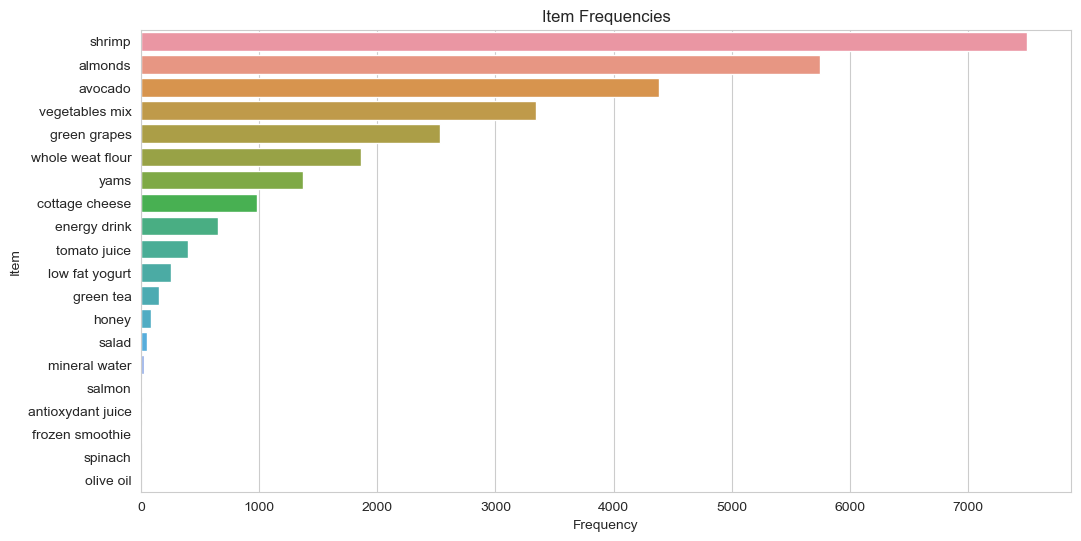

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.sum().values, y=item_counts.sum().index)
plt.title('Item Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.show()

In [38]:
data_bin = pd.get_dummies(df)

In [40]:
df.fillna(0, inplace=True)
df_bin = df.astype(bool).astype(int)
freq_itemsets = apriori(df_bin, min_support=0.05, use_colnames=True)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [41]:
rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.5)


In [42]:
print(rules.head(10))

          antecedents consequents  antecedent support  consequent support  \
0            (shrimp)   (almonds)            1.000000            0.766133   
1           (almonds)    (shrimp)            0.766133            1.000000   
2            (shrimp)   (avocado)            1.000000            0.585067   
3           (avocado)    (shrimp)            0.585067            1.000000   
4    (vegetables mix)    (shrimp)            0.445867            1.000000   
5      (green grapes)    (shrimp)            0.337067            1.000000   
6  (whole weat flour)    (shrimp)            0.248400            1.000000   
7              (yams)    (shrimp)            0.182400            1.000000   
8    (cottage cheese)    (shrimp)            0.130667            1.000000   
9      (energy drink)    (shrimp)            0.087067            1.000000   

    support  confidence  lift  leverage  conviction  zhangs_metric  
0  0.766133    0.766133   1.0       0.0         1.0            0.0  
1  0.766133   